In [73]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import scikit_posthocs as sp
%load_ext autoreload
%autoreload 2


share_file = 'ridesharing.csv'
hail_file = 'ridehailing.csv'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df1 = pd.read_csv(share_file)

# read the second CSV file into a DataFrame
df2 = pd.read_csv(hail_file)

# concatenate the two DataFrames vertically
results_df = pd.concat([df1, df2], ignore_index=True)


In [5]:

results_df = results_df.dropna(subset="dropoff_time") # drop cars
results_df = results_df[results_df.dropoff_time != -1] # drop passengers that left
results_df = results_df.drop_duplicates(subset=['seed_int', 'iteration', 'num_drivers', 'strategy', 'AgentID', 'multi_pass'], keep='last')


results_df['strategy'] = results_df['strategy'].astype(str)
results_df['waitingTime'] = results_df['pickup_time'] - results_df['request_time']




results_df

avgs = results_df.groupby(['strategy', 'num_drivers', 'multi_pass'])['waitingTime'].mean().reset_index()

avgs_df = pd.DataFrame(avgs)
groups = (avgs_df.groupby(['strategy']))


C:\Users\lokhe\AppData\Local\Temp\ipykernel_19116\329790437.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (n, type) in enumerate(groups):
C:\Users\lokhe\AppData\Local\Temp\ipykernel_19116\329790437.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in types:
C:\Users\lokhe\AppData\Local\Temp\ipykernel_19116\329790437.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in types:
C:\Users\lokhe\AppData\Local\Temp\ipykernel_1911

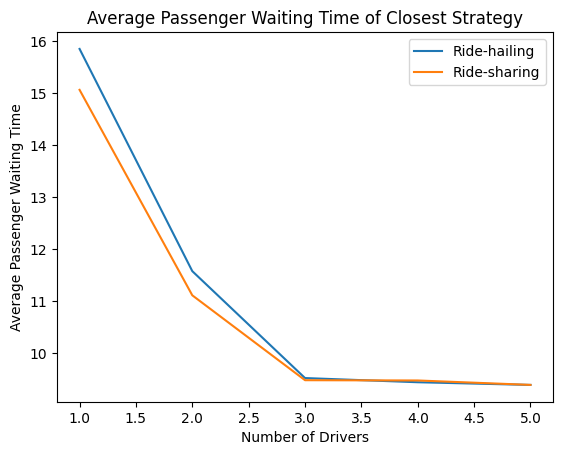

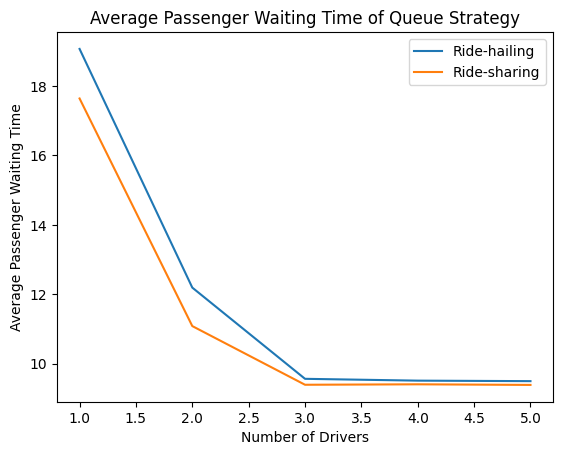

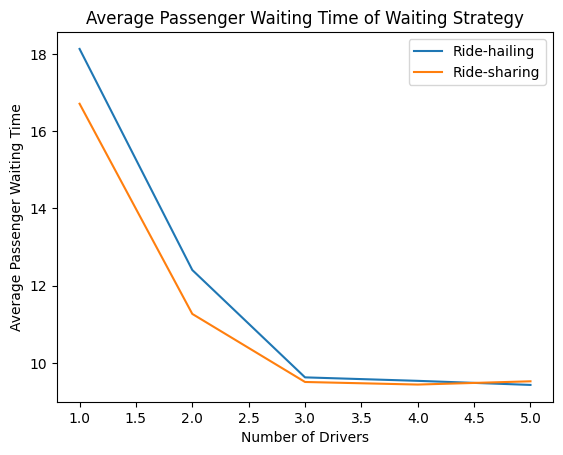

In [11]:
strats = ['Closest', 'Queue', 'Waiting']
files = ['Ride-hailing', 'Ride-sharing']

for i, (n, type) in enumerate(groups):
    fig, ax = plt.subplots()
    types = (type.groupby(['multi_pass']))

    for name, group in types:
        ax.plot(group['num_drivers'], group['waitingTime'], label=name)

    ax.legend()

    ax.set_xlabel('Number of Drivers')
    ax.set_ylabel(f'Average Passenger Waiting Time')
    ax.set_title(f'Average Passenger Waiting Time of {strats[i]} Strategy')
    plt.legend(files)



    plt.savefig(f'figures/Wait_time{strats[i]}.png')


,multi_pass,num_drivers,sec_id,strategy,waitingTime


,multi_pass,num_drivers,sec_id,strategy,waitingTime


,multi_pass,num_drivers,sec_id,strategy,waitingTime


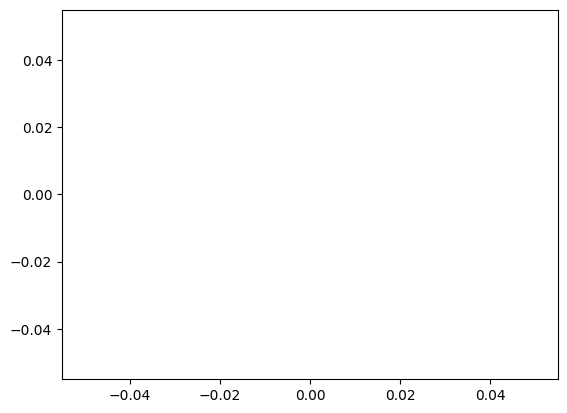

In [36]:

n=5
for strategy in ["StepType.CLOSEST", "StepType.QUEUE", "StepType.WAITING"]:


    avgs_by_agent = results_df.groupby(['multi_pass', 'num_drivers', "sec_id", "strategy"])['waitingTime'].mean().reset_index()
    # avgs_df = pd.DataFrame(avgs)
    n_car = avgs_by_agent[(avgs_by_agent["num_drivers"]== n) & avgs_by_agent["strategy"]== strategy]
    display(n_car)

    sns.swarmplot(x="waitingTime", y="multi_pass", data=n_car, size=1)
    # plt.savefig(f'figures/swarm_{n}.png')


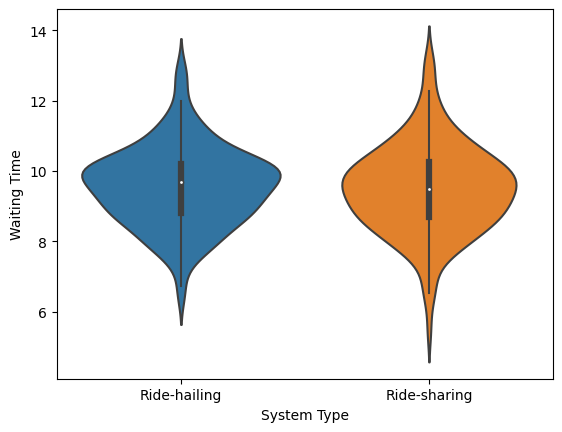

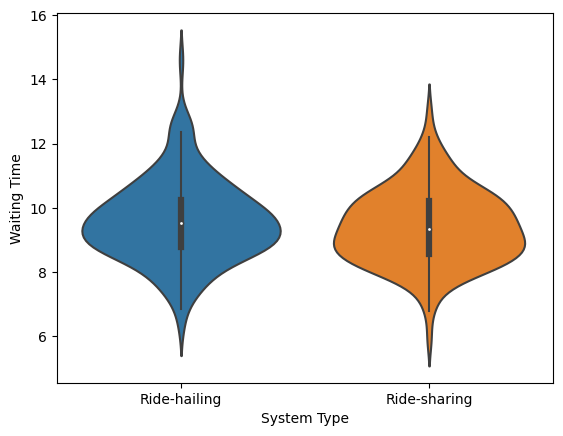

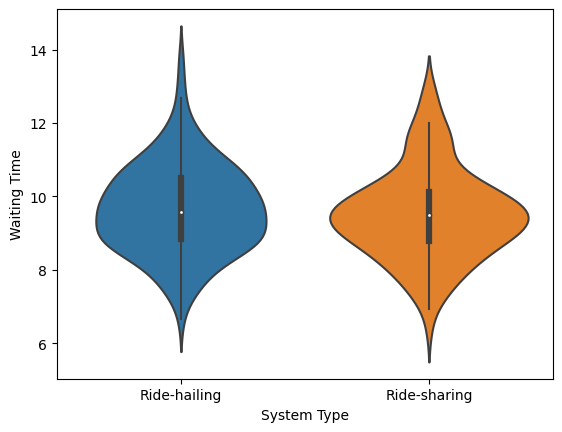

In [70]:
n=3
# n_car = avgs_by_agent[avgs_by_agent["num_drivers"]== n]
for strat in ["StepType.CLOSEST", "StepType.QUEUE", "StepType.WAITING"]:
    fig, ax = plt.subplots()


    avgs_by_agent = results_df.groupby(['multi_pass', 'num_drivers', "sec_id", "strategy"])['waitingTime'].mean().reset_index()
    n_car = avgs_by_agent[(avgs_by_agent["num_drivers"]== n) & (avgs_by_agent["strategy"]== strat)]


    ax = sns.violinplot(y="waitingTime", x="multi_pass", data=n_car, size=1)
    ax.set_xticklabels(['Ride-hailing', 'Ride-sharing'])
    ax.set_ylabel("Waiting Time")
    ax.set_xlabel("System Type")

    ax.set_label("Strategy")
    plt.savefig(f'figures/violin_{strat}_{n}.png')

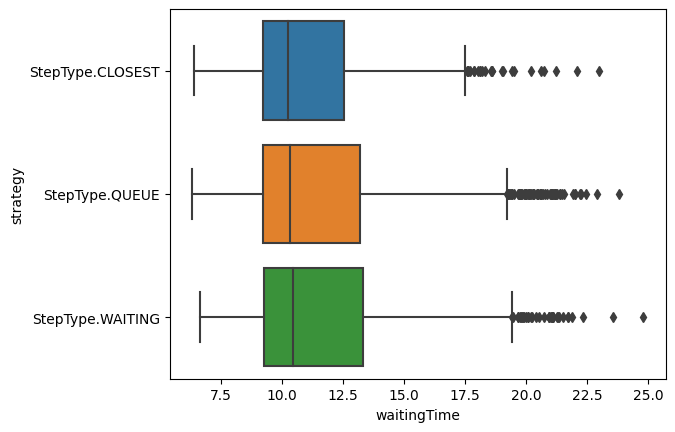

In [7]:
n=1
sns.boxplot(x="waitingTime", y="strategy", data=avgs_by_agent)


plt.savefig(f'figures/box_{n}.png')

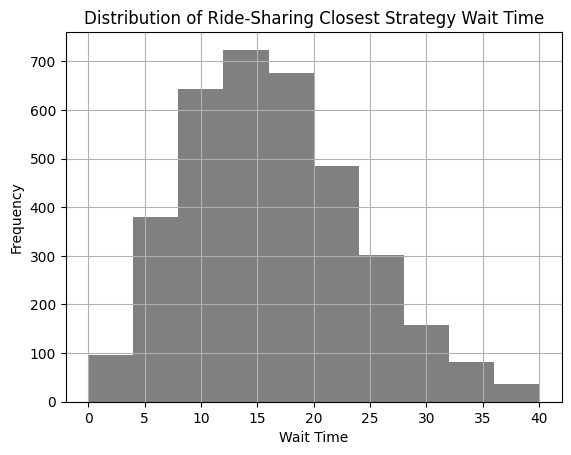

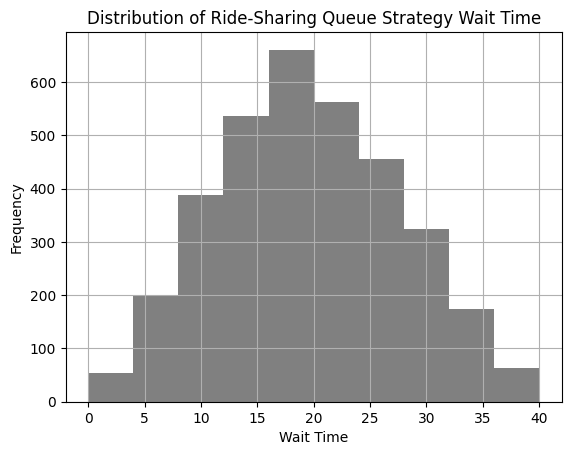

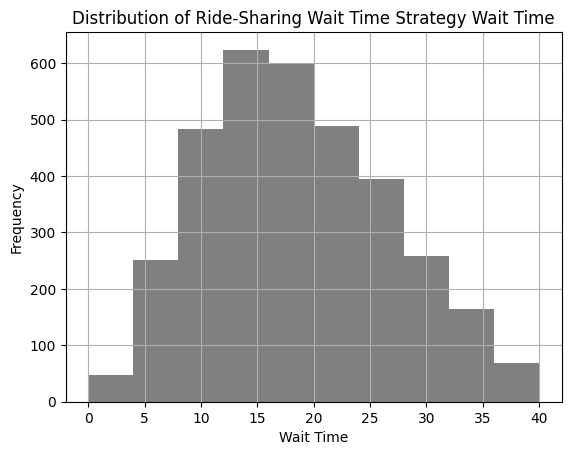

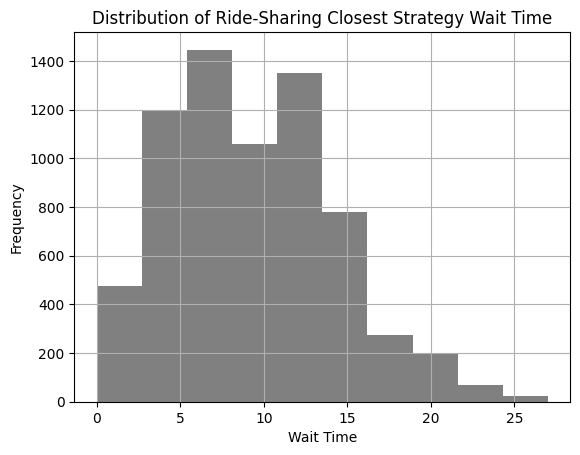

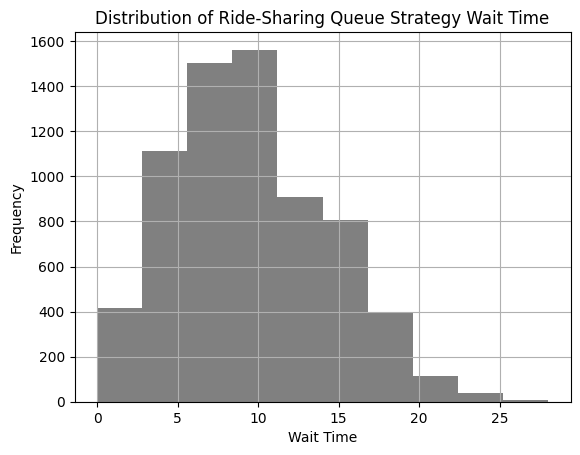

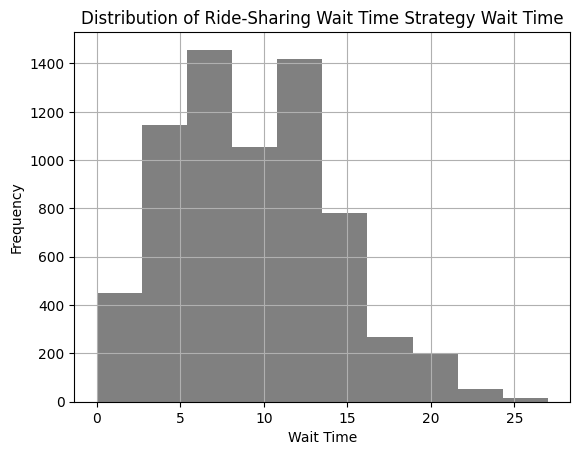

In [8]:
# HISTOGRAMS

labels = ['Wait Time']

for n in [1,5]:
    n_car = results_df[results_df["num_drivers"]== n]

    closest = n_car[n_car["strategy"] == "StepType.CLOSEST"]
    queue = n_car[n_car["strategy"] == "StepType.QUEUE"]
    waiting = n_car[n_car["strategy"] == "StepType.WAITING"]

    closest.hist(column='waitingTime', color='grey')
    plt.xlabel(labels[0])
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Ride-Sharing Closest Strategy {labels[0]}")
    plt.savefig(f'figures/{labels[0]}_closest_{n}.png')


    queue.hist(column='waitingTime',  color='grey')
    plt.xlabel(labels[0])
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Ride-Sharing Queue Strategy {labels[0]}")
    plt.savefig(f'figures/{labels[0]}_queue_{n}.png')


    waiting.hist(column='waitingTime',  color='grey')
    plt.xlabel(labels[0])
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Ride-Sharing Wait Time Strategy {labels[0]}")
    # plt.savefig(f'figures/{labels[0]}_waiting_{n}.png')

    # plt.show()

## stats testing

In [74]:
for i in range(1,6):
    for strat in ["StepType.CLOSEST", "StepType.QUEUE", "StepType.WAITING"]:

        group1 = results_df[(results_df["strategy"] == strat) & (results_df["num_drivers"] == i) & results_df["multi_pass"]== True]['waitingTime']
        group2 = results_df[(results_df["strategy"] == strat) & (results_df["num_drivers"] == i) & results_df["multi_pass"]== False]['waitingTime']
                             

        stat, p = mannwhitneyu(group1, group2, alternative='greater')

        print('Statistics=%.3f' % (p), i, strat)

        # alpha = 0.05
        # if p > alpha:
        #     print('Samples look to be drawn from the same distributions (fail to reject H0)')
        # else:
        #     print('Samples look to be drawn from different distributions (reject H0)')

Statistics=0.000 1 StepType.CLOSEST
Statistics=0.000 1 StepType.QUEUE
Statistics=0.000 1 StepType.WAITING
Statistics=0.000 2 StepType.CLOSEST
Statistics=0.000 2 StepType.QUEUE
Statistics=0.000 2 StepType.WAITING
Statistics=1.000 3 StepType.CLOSEST
Statistics=1.000 3 StepType.QUEUE
Statistics=1.000 3 StepType.WAITING
Statistics=1.000 4 StepType.CLOSEST
Statistics=1.000 4 StepType.QUEUE
Statistics=1.000 4 StepType.WAITING
Statistics=1.000 5 StepType.CLOSEST
Statistics=1.000 5 StepType.QUEUE
Statistics=1.000 5 StepType.WAITING
